In [41]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from PIL import Image
from scipy.io import wavfile
import librosa
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import Image

In [3]:
 # read file
file = "DuHast(бас).wav"
sig, fs = librosa.core.load(file, sr=44100, mono=True)

In [5]:
abs_spectrogram = np.abs(librosa.stft(sig)) 

In [81]:
abs_spectrogram

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.34317976e-01, 5.42444706e-01, 1.46971986e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.16096532e-01, 4.95226681e-01, 1.40370503e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.08390731e-01, 2.39325553e-01, 1.19594485e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.50018051e-04, 3.12403106e-04, 1.21129749e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.76869245e-04, 4.00882593e-04, 7.98717301e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.06790718e-04, 3.18146747e-04, 3.99701894e-05]], dtype=float32)

In [36]:
abs_spectrogram.shape

(1025, 20870)

In [6]:
audio_signal = librosa.core.spectrum.griffinlim(abs_spectrogram) 

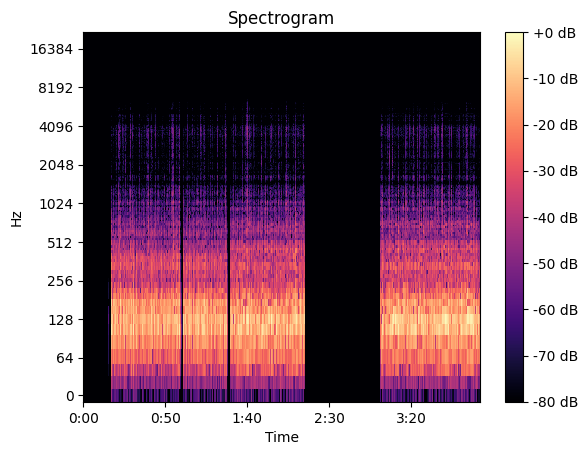

In [7]:
# Отображение спектрограммы
librosa.display.specshow(librosa.amplitude_to_db(abs_spectrogram, ref=np.max), sr=44100, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [10]:
# Восстановление временного сигнала из спектрограммы
reconstructed_signal = librosa.istft(abs_spectrogram ,window='hann')

In [11]:
# Сохранение аудио (Обратное преобразование Фурье)
sf.write('reconstructed_istft.wav', reconstructed_signal, 44100) 

In [13]:
# Сохранение аудио (Обратное преобразование Гриффина-Лимма)
sf.write('reconstructed_griff.wav', audio_signal, 44100)

Картинка

In [106]:
 # загрузка песни
file = "Du hast.mp3"
sig, fs = librosa.core.load(file, sr=44100, mono=True)
#спектрограмма песни
spec_song = np.abs(librosa.stft(sig)) 

In [107]:
spec_song.shape[0]

1025

In [137]:
 # read img
img_path = "спек.PNG"

In [140]:
#открытие изображения
spectrogram = plt.imread(img_path)
spectrogram = np.mean(spectrogram, axis=2)

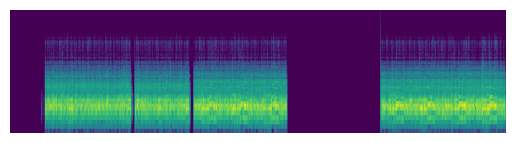

In [141]:
plt.imshow(spectrogram )
plt.axis('off')  # Отключение осей
plt.show()

In [142]:
# окно Ханна
signal_hann = librosa.core.spectrum.istft(spectrogram,window='hann')

In [ ]:
'''
#Преобразвоание Гриффина-Лимма
signal_griff = librosa.core.spectrum.griffinlim(reconstructed_spec, window='hann')
# окно Ханна
signal_hann = librosa.core.spectrum.istft(spectrogram,window='hann')
#Окно черного
signal_black = librosa.core.spectrum.istft(spectrogram,window='hann')'''


In [143]:
# Сохранение аудио
sf.write('rec_spec_hann.wav', signal_hann, 44100) 